Number of plates detected: 4


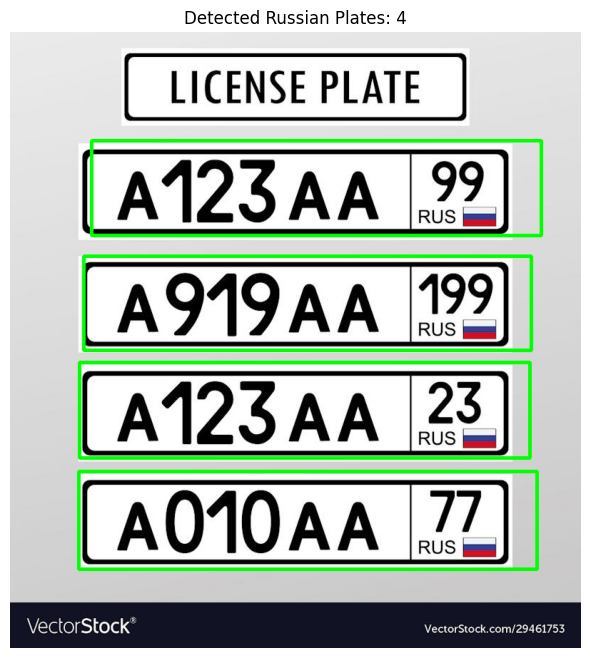

In [54]:
import cv2 as cv
import matplotlib.pyplot as plt

img_path = 'rus_plate.jpg' 
img = cv.imread(img_path)

if img is None:
    print(f"Error: Could not load image {img_path}. Check the file path.")
else:
    grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    plate_detector = cv.CascadeClassifier("haarcascade_russian_plate_number.xml")

    plates = plate_detector.detectMultiScale(grey, scaleFactor=1.05, minNeighbors=8, minSize=(200, 150))

    pad_x = 5  
    pad_y = 40  
    count = 0
    
    for (x, y, w, h) in plates:
        tight_x = x + pad_x
        tight_y = y + pad_y
        tight_w = w - (2 * pad_x)
        tight_h = h - (2 * pad_y)

        if tight_w > 0 and tight_h > 0:
            cv.rectangle(img, (tight_x, tight_y), (tight_x + tight_w, tight_y + tight_h), (0, 255, 0), 3)
            count += 1

    print(f"Number of plates detected: {count}")


    plt.figure(figsize=(12, 8))
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(f'Detected Russian Plates: {count}')
    plt.axis('off')
    plt.show()